In [3]:
import sklearn as sk
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sbn

In [4]:
diabetes_df = pd.read_csv('../datasets/pima_indian_diabetes_dataset.csv')
diabetes_df.head()

,PregnancyNumber,GlucoseConcentration,DiastolicBP,TricepsThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df[diabetes_df.isnull().any(axis=1)].count()

PregnancyNumber         0
GlucoseConcentration    0
DiastolicBP             0
TricepsThickness        0
Insulin                 0
BMI                     0
Pedigree                0
Age                     0
Class                   0
dtype: int64

In [6]:
print(diabetes_df.shape)
diabetes_df = diabetes_df.dropna()
print(diabetes_df.shape)

(768, 9)
(768, 9)


In [22]:
diabetes_df_corr = diabetes_df.corr()
diabetes_df_corr

,PregnancyNumber,GlucoseConcentration,DiastolicBP,TricepsThickness,Insulin,BMI,Pedigree,Age,Class
PregnancyNumber,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
GlucoseConcentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
DiastolicBP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
TricepsThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

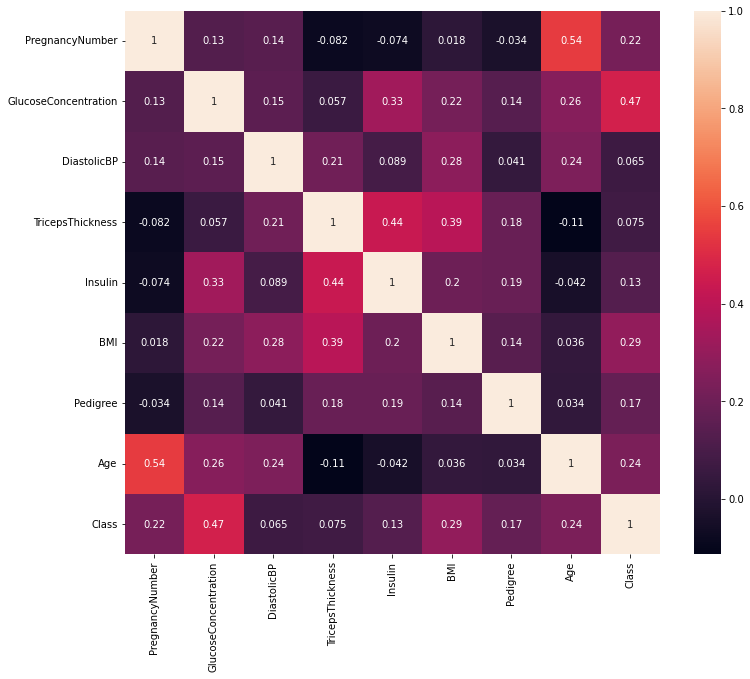

In [24]:
fig, ax = mp.pyplot.subplots(figsize=(12,10))
sbn.heatmap(diabetes_df_corr, annot=True)

In [7]:

X = diabetes_df.drop('Class', axis=1)
Y = diabetes_df['Class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [36]:
x_test.shape, y_test.shape

((154, 8), (154,))

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1, solver='liblinear').fit(x_train, y_train)

In [10]:
y_pred = model.predict(x_test)

In [11]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,87,11
1,27,29


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  0.7532467532467533
Precision:  0.725
Recall:  0.5178571428571429
